<a href="https://colab.research.google.com/github/EduardoAve/Data-science-projects/blob/main/bivariado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Descripción del conjunto de datos

El conjunto de datos contiene información sobre los ingresos laborales en universidades de Austria y República Checa. Tiene varias columnas, de las cuales hemos seleccionado las variables "Age" (Edad) e "Income EUR" (Ingreso en EUR) para el análisis.

#Justificación en la elección de variables

La elección de Age (Edad) y Income EUR (Ingreso en Euros) es interesante, ya que podemos explorar si existe alguna relación entre la edad de los trabajadores universitarios y su nivel de ingreso. Algunas posibles preguntas que podrías explorar:

¿Hay alguna tendencia en que los trabajadores más jóvenes ganen menos que los más mayores?
¿Existen diferencias en los ingresos por grupos de edad que podrían estar relacionadas con la experiencia laboral, el cargo o el sector?

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
#Se define la ruta en la que está el archvio .csv
url = 'https://raw.githubusercontent.com/EduardoAve/Data-science-projects/refs/heads/main/dataExample.csv'

df = pd.read_csv(url)

df.head(6)

,Income EUR,Age
0,1666.388935,28.0
1,750.000000,33.0
2,NaN,32.0
3,1423.679387,30.0
4,1374.770872,39.0
5,1666.388935,39.0


#Estadísticas individuales de ambas variables


In [15]:
# Estadísticas descriptivas de las variables numéricas
df.describe()

,Income EUR,Age
count,2429.000000,2699.000000
mean,4251.711647,42.773620
std,10588.861200,10.990472
min,0.000000,18.000000
25%,1458.090318,34.000000
50%,2100.000000,42.000000
75%,3700.000000,50.000000
max,130000.000000,84.000000


Se nota una gran desviación estándar en la columna de "Income Eur", esta gran dispersión puede afectar la fidelidad de medidas como la media.
La mediana es una medida más robusta, por lo tanto, nos dará más información sobre un dato central para los ingresos.

In [16]:
df.median()

,0
Income EUR,2100.0
Age,42.0


Dado que la media es significativamente mayor que la mediana, la distribución de los datos probablemente esté sesgada a la derecha, lo que indica la presencia de valores atípicos o una cola larga en la parte superior de la distribución.

Es importante conocer la cantidad de valores nulos en ambas columnas, esto será de importancia ya que seguramente se deba prescindir de esos registros.

In [17]:
# Calcular el número de valores nulos en las columnas 'Income EUR' y 'Age'
nulos_income = df['Income EUR'].isnull().sum()
nulos_age = df['Age'].isnull().sum()

print(f"Número de valores nulos en 'Income EUR': {nulos_income}")
print(f"Número de valores nulos en 'Age': {nulos_age}")

Número de valores nulos en 'Income EUR': 319
Número de valores nulos en 'Age': 49


Existe una cantidad grande de valores nulos en el ingreso en euros.

#Histogramas para ambas variables

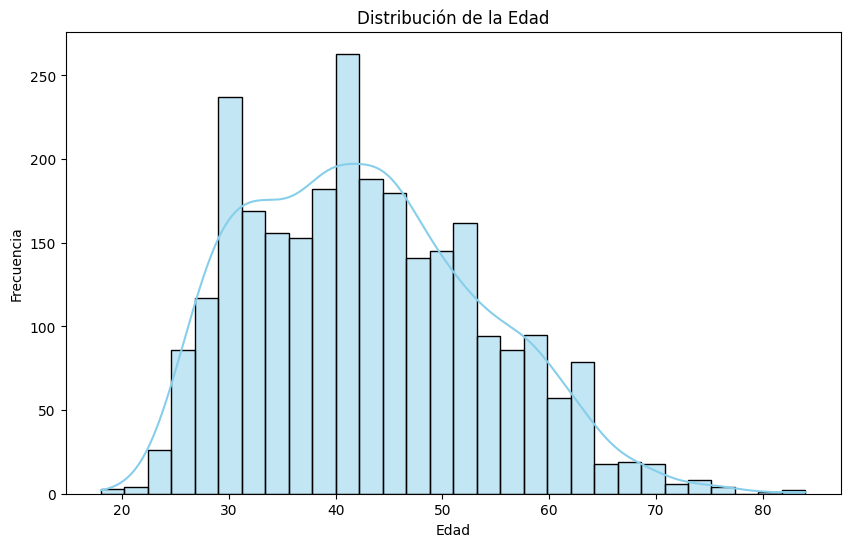

In [18]:
# Histograma para la columna 'Age'
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución de la Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()


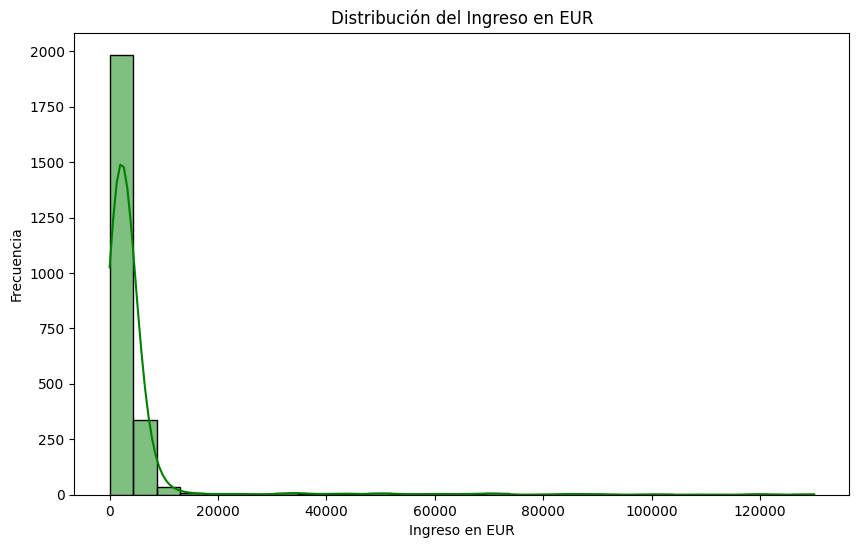

In [19]:
# Histograma para la columna 'Income EUR'
plt.figure(figsize=(10, 6))
sns.histplot(df['Income EUR'], kde=True, bins=30, color='green', edgecolor='black')
plt.title('Distribución del Ingreso en EUR')
plt.xlabel('Ingreso en EUR')
plt.ylabel('Frecuencia')
plt.show()

Se observa una gran dispersión de los datos. El valor más alto registrado es 130,000 EUR, lo que podría indicar que hay algunos trabajadores con salarios muy elevados. Este es un valor atípico que está muy por encima de la media y podría estar afectando la interpretación de los ingresos en general.

#Indice de correlación de Pearson

In [20]:
# Correlación de Pearson entre Age e Income EUR
correlation = df[['Age', 'Income EUR']].corr()
print(correlation)

                 Age  Income EUR
Age         1.000000    0.108406
Income EUR  0.108406    1.000000


El índice de correlación de perason nos indica una relación lineal pobre entre este par de variables. Se realizará un diagrama de dispersión para observar la relación entre ambas variables.


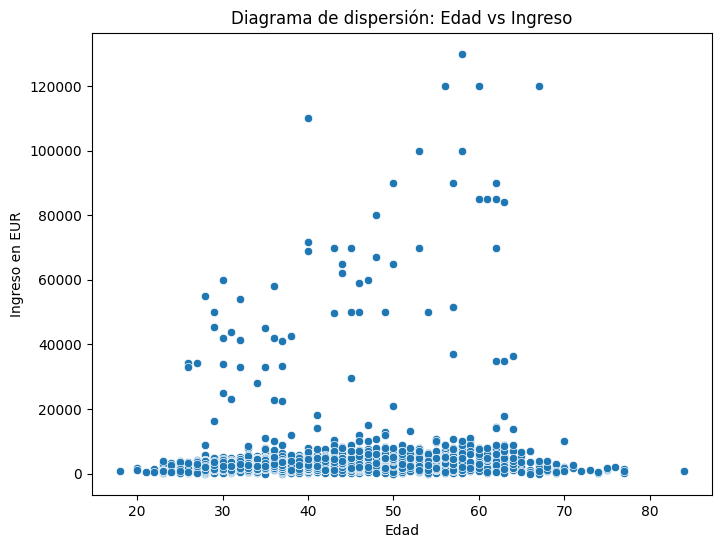

In [21]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Income EUR', data=df)
plt.title('Diagrama de dispersión: Edad vs Ingreso')
plt.xlabel('Edad')
plt.ylabel('Ingreso en EUR')
plt.show()

El diagrama de dispersión revela una gran disparidad en los registros de ingresos, indicando una considerable variabilidad en los datos. Esta dispersión podría deberse a varias razones:

Diversidad de profesiones: Es posible que algunos individuos tengan múltiples fuentes de ingresos, como trabajos adicionales fuera del ámbito académico. Esto podría explicar los valores elevados de ingresos observados en el gráfico.
Diferencias en la unidad de medida: Otra posible causa es que algunos participantes hayan reportado su salario de forma anual, mientras que la mayoría de los demás indicaron su salario mensual. Esta discrepancia en la unidad de medida puede estar generando distorsiones en la distribución de los ingresos, especialmente en los valores más altos.

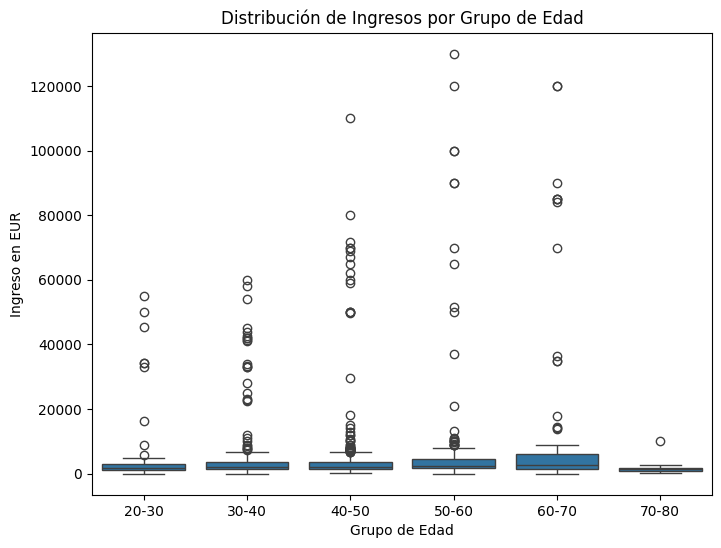

In [22]:
# Crear categorías de edad
bins = [20, 30, 40, 50, 60, 70, 80]
labels = ['20-30', '30-40', '40-50', '50-60', '60-70', '70-80']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Boxplot comparativo entre grupos de edad y los ingresos
plt.figure(figsize=(8, 6))
sns.boxplot(x='Age Group', y='Income EUR', data=df)
plt.title('Distribución de Ingresos por Grupo de Edad')
plt.xlabel('Grupo de Edad')
plt.ylabel('Ingreso en EUR')
plt.show()

#Conclusiones

- Problemas con la variable "Income EUR": Durante el análisis de la variable "Income EUR", encontramos una gran dispersión en los datos, lo que genera dificultades para interpretar su distribución y la relación con otras variables. Esta dispersión es bastante amplia y no hemos podido determinar con certeza su naturaleza.
- Posibles causas de la dispersión: Basándonos en las características del conjunto de datos, planteamos varias hipótesis:
Algunos individuos podrían haber reportado su salario anual en lugar de mensual, lo que explicaría la gran diferencia entre ciertos valores.
Es posible que algunos registros incluyan ingresos adicionales fuera del sector académico, lo que también podría incrementar los valores atípicos.
- Impacto de los valores atípicos: La presencia de numerosos valores atípicos en la variable de ingresos dificulta la visualización y el análisis de la relación entre Edad e Income EUR. La gran variabilidad en los ingresos genera una representación distorsionada en los gráficos y no permite una interpretación clara de la correlación entre ambas variables.
- Correlación de Pearson: El índice de correlación de Pearson entre Edad e Income EUR fue de 0.1, lo que indica una correlación muy baja entre ambas variables. Este valor sugiere que no existe una relación significativa entre la edad y los ingresos en el conjunto de datos analizado, al menos en su forma actual.
- Próximos pasos:
Revisión de la variable "Income EUR": Es fundamental revisar y limpiar los datos de la variable de ingresos. Podríamos investigar la unidad de medida (mensual o anual) y analizar los valores atípicos para determinar si deben ser corregidos o eliminados.
- Imputación o eliminación de valores atípicos: Es importante considerar cómo tratar los valores atípicos, ya sea imputándolos con valores más razonables o eliminándolos para mejorar la precisión de los análisis futuros.
- Reevaluación de la relación entre "Age" e "Income EUR": Una vez que se hayan manejado los valores atípicos, sería conveniente realizar un nuevo análisis para determinar si hay alguna relación más significativa entre estas dos variables.